In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# from sklearn import cluster
# from sklearn import metrics
# from scipy import stats
# from sklearn.metrics import silhouette_score
# from sklearn import decomposition
from scipy.cluster import hierarchy
# from scipy import stats
# from random import sample 
# import math
import os
# from sklearn import decomposition
# import glob
# from sklearn import linear_model
from scipy.stats import zscore

In [2]:
# set output directory
os.chdir("/ix/djishnu/Aaron_F/morgan_satarupa_RNAseq/AM_Results/20250117/DEG_analysis/IL33_and_fibrosis_and_bleo")

In [10]:
# load data
sign_is_correct = False
data = pd.read_csv('/ix/djishnu/Aaron_F/morgan_satarupa_RNAseq/AM_Results/20250117/DEG_analysis/IL33/pairwise_LFCandPadjust/Unstim_WT_0_Exp1_vs_IL33_WT_24_Exp1/resultsOrdered_Unstim_WT_0_Exp1_vs_IL33_WT_24_Exp1.txt', index_col=0)
if not sign_is_correct:
    data["log2FoldChange"] = data["log2FoldChange"] * -1
print(data.shape)

# load degs
degs = np.loadtxt("IL33_DEGs_and_fibrosis_and_bleo.csv", dtype=str)
print(len(degs))


(13712, 6)
461


In [11]:
# Convert both data index and degs list to uppercase
data.index = data.index.str.upper()
degs = [deg.upper() for deg in degs]

# Make sure degs are in current data
print(len(degs))
deg_subset = [deg for deg in degs if deg in data.index]

print(len(deg_subset))


461
460


In [12]:
# Make data coefficient-specific
deg_data = data.loc[deg_subset]
deg_data

,baseMean,log2FoldChange,lfcSE,pvalue,padj,adjusted_padj
CCL17,4236.856246,5.952098,0.456892,2.486693e-39,1.146632e-36,3.386502e-34
CCR5,1553.403674,2.098378,0.197550,2.875064e-27,5.379703e-25,6.758392e-23
TIMP1,181.556748,2.662989,0.309429,5.932117e-19,5.245861e-17,3.321784e-15
MMP12,4420.984703,3.185280,0.356292,5.036161e-20,4.711730e-18,3.283778e-16
ARG1,487.890745,3.680694,0.592680,6.826041e-11,2.103366e-09,5.449255e-08
...,...,...,...,...,...,...
KIF5C,23.715762,0.892508,0.437730,2.721924e-03,1.497987e-02,8.935403e-02
SLC26A11,24.966282,0.850529,0.417722,2.818033e-03,1.537120e-02,9.121558e-02
AMOTL1,55.841637,0.632103,0.337938,6.402703e-03,3.030253e-02,1.583850e-01
NCS1,16.561517,0.688415,0.504571,1.111650e-02,4.730557e-02,2.257709e-01


In [13]:
# Sort columns alphanumerically
sorted_columns = sorted(deg_data.columns)
print(sorted_columns)

['adjusted_padj', 'baseMean', 'lfcSE', 'log2FoldChange', 'padj', 'pvalue']


In [28]:

sorted_data = deg_data[["log2FoldChange"]].sort_values("log2FoldChange", ascending=False)


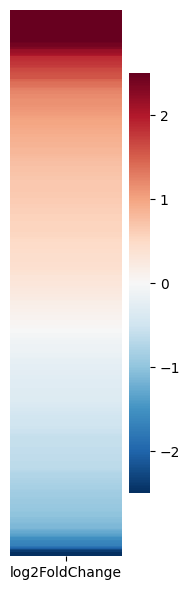

In [40]:
# heatmap
c = sns.color_palette("RdBu_r", as_cmap=True)
plt.figure(figsize=(2, 6))
fc_heatmap = sns.heatmap(
    sorted_data,
    cmap=c,
    vmin=-2.5,
    vmax=2.5,
    yticklabels=False
)

plt.tight_layout()
plt.savefig('IL33_DEGs_fibrosis_bleo_heatmap.pdf',format='pdf')
plt.show()


In [37]:
# Positive genes
positive_genes = sorted_data.loc[sorted_data["log2FoldChange"] > 0].index

# Negative genes
negative_genes = sorted_data.loc[sorted_data["log2FoldChange"] < 0].index


In [38]:
# Save to text files (one gene per line)
positive_genes.to_series().to_csv("IL33_DEGs_and_fibrosis_and_bleo_UP.txt", index=False, header=False)
negative_genes.to_series().to_csv("IL33_DEGs_and_fibrosis_and_bleo_DOWN.txt", index=False, header=False)
